# Summary Statistics of Yearly Aggregated Data

<a id='top'></a>

<a href=#readdata>Read Data</a>  

<a href=#summary>Summary Statistics</a>

<a href=#end>End</a>


In [1]:
# Ignore 'dask' warning

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

<a id='readdata'></a>

# Read in Yearly data
<a href=#top>Top</a>

In [2]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)



dtype={ 'id_company'  :np.float64,
        'id_branch'    :np.int64,
        'is_discontinued':bool,
        'code_discontinuation': np.float64,
        'code_financial_calamity':object,
        'financial_calamity_outcome'   : np.float64,
        'code_legal_form' : np.float64,
        'qty_employees' :np.float64,
        'year_qty_employees' :np.float64,
        'id_company_creditproxy':object,
        'score_payment_assessment'    : np.float64,
        'amt_revenue'  : np.float64,
        'year_revenue'  : np.float64,
        'amt_operating_result'   : np.float64,
        'year_operating_result'    :object,
        'amt_consolidated_revenue'   : np.float64,
        'year_consolidated_revenue'   :object,
        'amt_consolidated_operating_result'     : np.float64,
        'year_consolidated_operating_result'   :object,
        'qty_issued_credit_reports' : np.float64,
        'perc_credit_limit_adjustment' :object,
        'color_credit_status'  :object,
        'rat_pd'              :object,
        'score_pd'            : np.float64,
        'has_increased_risk'  :bool,
        'is_sole_proprietor'   :bool,
        'code_sbi_2'         : np.float64,
        'qty_address_mutations_total'  :np.float64,
        'qty_address_mutations_month'   :np.float64,
        'has_relocated':bool,
        'qty_started_names': np.float64,
        'qty_stopped_names': np.float64,
        'total_changeof_board_members_' :np.float64
}

# Setting up dictionary of column types
parse_dates= ['date_month', 'date_relocation_last', 'date_relocation_penultimate']

def read_one_year_from_bucket_merged_csv(year, dir_prefix = ''):
    """ Reads a whole year of data from the already merged files """
    full_year_df = pd.DataFrame()
    print('Starting with year: ', year)
    print(dir_prefix)
    blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
    for blob in blob_list:  
        print("blob", blob.name)
        if year in blob.name:
            print('Processing file: ', blob.name)
            with fs.open('graydon-data/' + blob.name) as f:
                full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates)   
        print('The number of rows so far is: ', full_year_df.shape[0])
    return full_year_df



In [3]:
data_df = read_one_year_from_bucket_merged_csv(
    dir_prefix= '03_aggregrated', year = '2017')

Starting with year:  2017
03_aggregrated
blob 03_aggregrated/
The number of rows so far is:  0


In [4]:
data_df0 = pd.read_csv('2015_aggregated.csv')

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_df1 = pd.read_csv('2016_aggregated.csv')

In [6]:
data_df2 = pd.read_csv('2017_aggregated.csv')

In [7]:
data_df = data_df0.append(data_df1).append(data_df2)

In [8]:
data_df.shape

(5787251, 59)

In [9]:
data_df.columns

Index(['Unnamed: 0', 'id_branch', 'id_company', 'date_month', 'code_sbi_1',
       'has_relocated', 'has_name_change', 'delta_qty_employees',
       'delta_qty_issued_credit_reports', 'delta_score_payment_assessment',
       'code_legal_form_has_changed', 'SBI_has_changed', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'years_in_current_location',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'unique_id', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'code_legal_form_group_1',
       'code_legal_form_group_2', 'SBI_group_1', 'SBI_group_2',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operati

<a id='summary'></a>
# Summary Statistics

<a href=#top>Top</a>

### Overall probability of moving:

In [12]:
data_df[data_df.has_relocated_next_year.isna()] = 0

In [13]:
data_df.has_relocated_next_year.value_counts()

False    5550674
True      236577
Name: has_relocated_next_year, dtype: int64

In [14]:
data_df.has_relocated_next_year.value_counts() / data_df.shape[0]

False    0.959121
True     0.040879
Name: has_relocated_next_year, dtype: float64

In [15]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

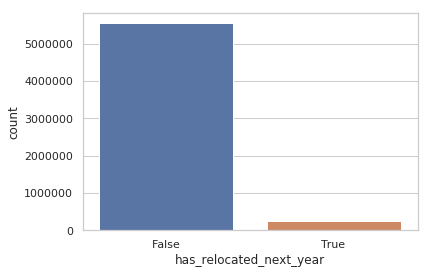

In [16]:
sns.countplot(x='has_relocated_next_year', data=data_df)
plt.show()

#### Overall Summary

In [17]:
data_df.describe()

,Unnamed: 0,id_branch,id_company,delta_qty_employees,delta_qty_issued_credit_reports,delta_score_payment_assessment,company_age,years_since_last_amt_consolidated_operating_result,years_since_last_amt_consolidated_revenue,years_since_last_amt_operating_result,...,mean_score_payment_assessment,mean_score_pd,qty_address_mutations_year,qty_started_names_year,qty_stopped_names_year,qty_board_changes_year,variance_qty_employees,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd
count,5.787251e+06,5.787251e+06,5.787251e+06,4.936804e+06,5.787251e+06,5.787251e+06,5.699041e+06,378484.000000,324781.000000,378484.000000,...,5.787251e+06,4.004080e+06,5.787251e+06,5.787251e+06,5.787251e+06,5.787251e+06,4.885313e+06,5.759848e+06,5.787251e+06,5.787251e+06
mean,9.231761e+05,3.634785e+07,7.329764e+08,1.599583e+00,-8.426626e-03,-5.615585e-02,1.830330e+01,1.813752,1.535755,1.813752,...,2.300949e+01,-4.863462e+00,9.309826e-02,2.173502e-02,1.589701e-05,2.410808e-01,4.204667e+03,1.158034e-01,2.700585e+02,-3.894856e+01
std,5.766370e+05,2.020945e+07,3.650487e+08,1.962703e+02,4.654115e-01,1.373848e+00,2.107591e+01,2.733593,2.747152,2.733593,...,7.148815e+00,1.257175e+00,3.224354e-01,2.742239e-01,1.307920e-02,1.533309e+00,7.981054e+05,5.164214e-01,8.902018e+01,2.962613e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-8.199400e+04,-1.400000e+01,-2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,-5.973000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.720900e+01
25%,4.207580e+05,2.120858e+07,8.931867e+08,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000,0.000000,0.000000,...,2.000000e+01,-5.442000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+02,-6.241400e+01
50%,9.182290e+05,3.763792e+07,9.080883e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,0.000000,0.000000,...,2.800000e+01,-5.107583e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.880000e+02,-5.898600e+01
75%,1.420130e+06,5.392508e+07,9.239943e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,3.000000,2.000000,3.000000,...,2.800000e+01,-4.934917e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.333333e-02,3.360000e+02,0.000000e+00
max,1.966207e+06,7.262735e+07,9.410078e+08,3.496600e+04,1.500000e+01,2.900000e+01,3.160000e+02,11.000000,10.000000,11.000000,...,2.900000e+01,3.035000e+00,2.300000e+01,2.400000e+01,2.800000e+01,2.410000e+02,1.629822e+09,1.899015e+02,3.920000e+02,3.642000e+01


### Subset for companies with number of employees > 50

In [18]:
mult_companies = data_df[data_df['mean_qty_employees']>50]

In [19]:
mult_companies.shape

(239682, 59)

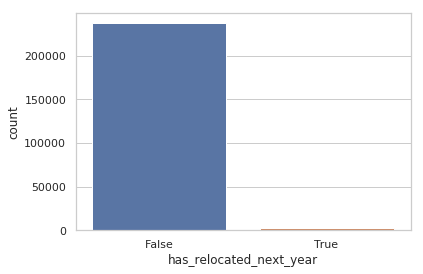

In [20]:
sns.countplot(x='has_relocated_next_year', data=mult_companies)
plt.show()

Text(0, 0.5, 'Frequency')

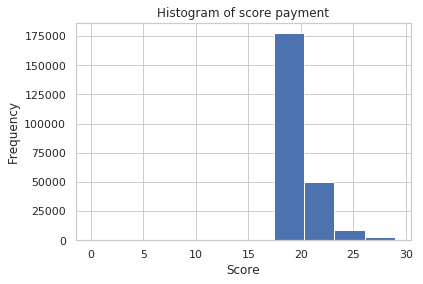

In [21]:
mult_companies.mean_score_payment_assessment.hist()
plt.title('Histogram of score payment')
plt.xlabel('Score')
plt.ylabel('Frequency')

### Inspect Histograms simultaneously

Define columns to view:

In [24]:
feature_cols = ['mean_score_pd', 'mean_score_payment_assessment', 'code_sbi_1']

In [25]:
subset_data = mult_companies[feature_cols]

mean_score_pd
mean_score_payment_assessment
code_sbi_1


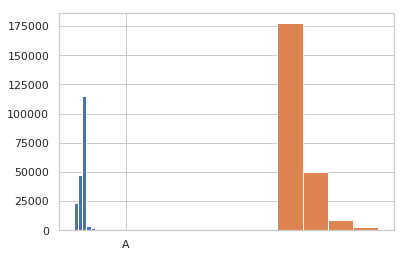

In [26]:
for cols in feature_cols:
    print(cols)
    mult_companies[cols].hist()
#     plt.title('Histogram of', cols)
#     plt.xlabel(cols)
#     plt.ylabel('Frequency')

In [25]:
mult_companies.dtypes

id_branch                                                        int64
date_month                                              datetime64[ns]
id_company                                                     float64
code_sbi_2                                                     float64
code_sbi_1                                                      object
qty_address_mutations_total                                    float64
has_relocated                                                     bool
has_name_change                                                   bool
date_relocation_last                                    datetime64[ns]
date_relocation_penultimate                             datetime64[ns]
ratio_operating_result_consolidated_operating_result           float64
ratio_revenue_consolidated_revenue                             float64
qty_green_flags                                                float64
qty_orange_flags                                               float64
qty_re

In [29]:
feature_cols = ['mean_score_pd', 'mean_score_payment_assessment', 
                'mean_qty_employees', 'qty_address_mutations_year']

### Remove qty_address_mutations_total

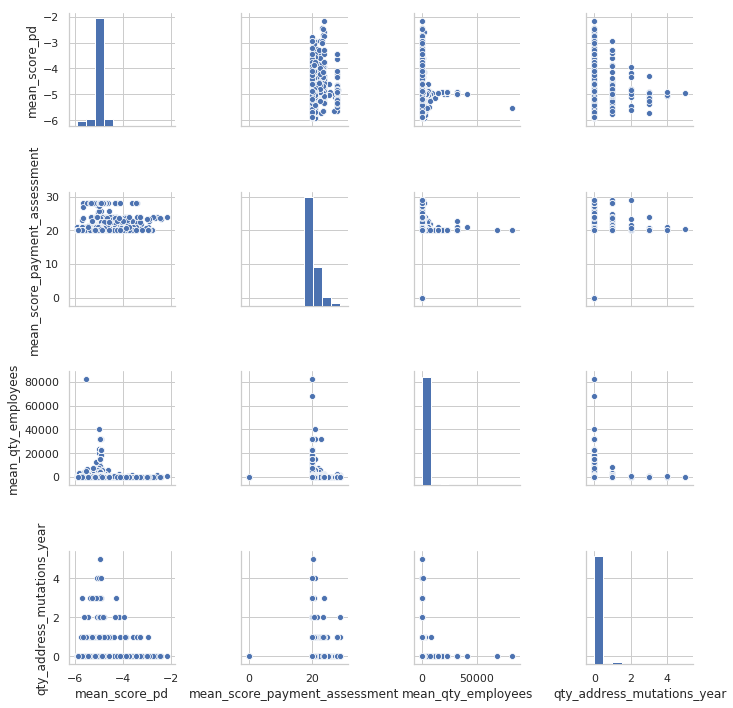

In [30]:
g = sns.pairplot(mult_companies[:10000], vars=feature_cols)

### Select companies with < 10000 employees

<a href=#top>Top</a>

In [32]:
subset_large_companies = mult_companies.loc[mult_companies.mean_qty_employees < 10000]

In [33]:
subset_large_companies['mean_qty_employees'].describe()

count    228966.000000
mean       1069.754889
std        1631.715113
min          50.083333
25%         120.000000
50%         366.250000
75%        1204.000000
max        9721.000000
Name: mean_qty_employees, dtype: float64

In [34]:
subset_large_companies['delta_qty_employees'].describe()

count    228966.000000
mean        -12.606719
std         383.803829
min      -11999.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       24619.000000
Name: delta_qty_employees, dtype: float64

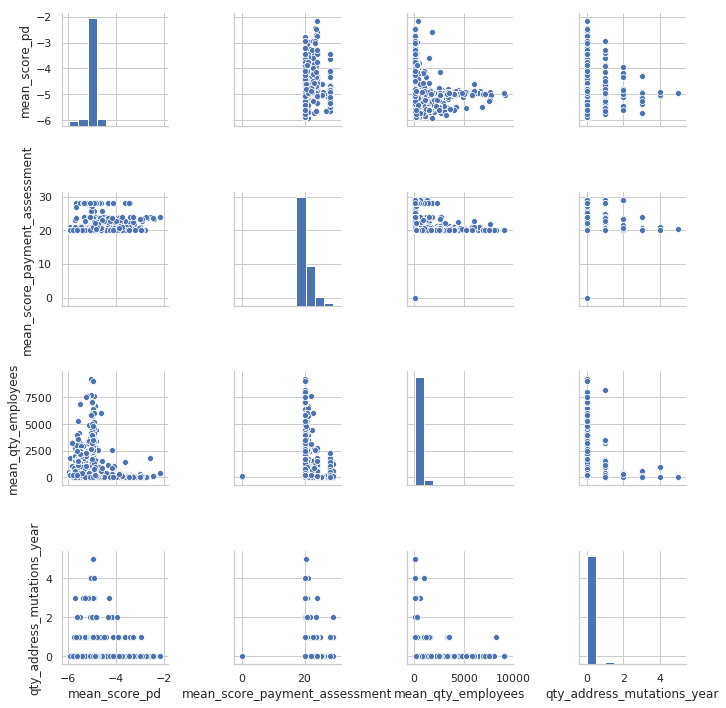

In [35]:
g = sns.pairplot(subset_large_companies[:10000], vars=feature_cols)

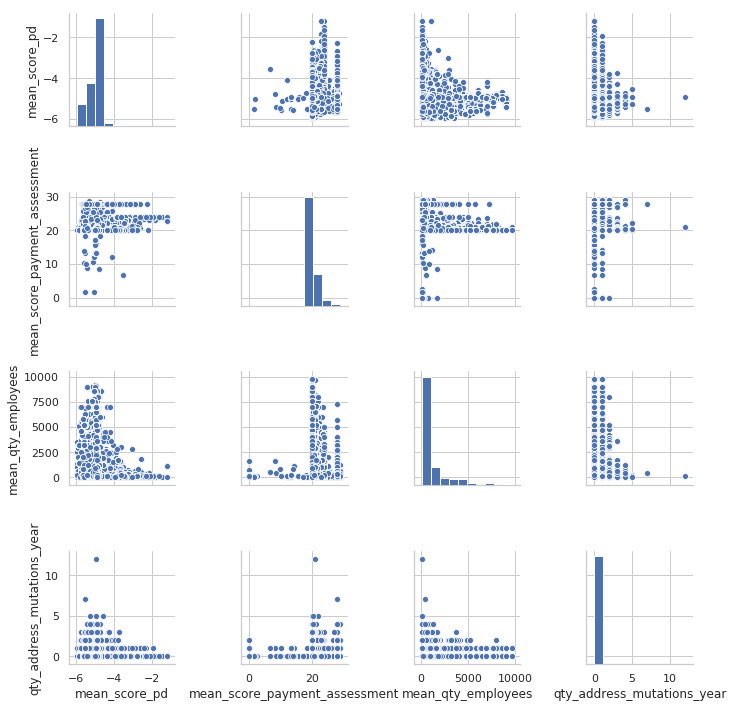

In [36]:
g = sns.pairplot(subset_large_companies, vars=feature_cols)

In [37]:
subset_large_companies.shape

(228966, 59)

In [38]:
subset_large_companies['has_relocated_next_year'].value_counts() / subset_large_companies.shape[0]

False    0.988876
True     0.011124
Name: has_relocated_next_year, dtype: float64

### Some other Summary Stats:


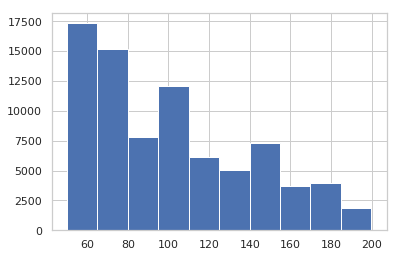

In [39]:
mult_companies.loc[(mult_companies.mean_qty_employees>10) & (mult_companies.mean_qty_employees<200)]['mean_qty_employees'].hist()

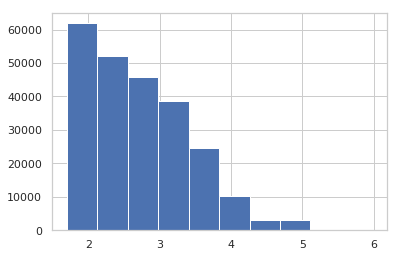

In [40]:
np.log10(mult_companies['mean_qty_employees']).hist()

<a id='end'></a>

<a href=#top>Top</a>

# End